In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

set = pd.read_csv('TASK2_dataset.csv')

key1 = set.keyword_1.unique()
key2 = set.keyword_2.unique()
key3 = set.keyword_3.unique()

keys = np.concatenate([key1, key2, key3])
genre = set.genre



In [ ]:
set_key1 = np.zeros((len(genre),len(key1)))
set_key2 = np.zeros((len(genre),len(key2)))
set_key3 = np.zeros((len(genre),len(key3)))

for j in range(len(key1)):
    for i in range(len(genre)):
        if ((keys[j] == set.keyword_1[i])|(keys[j] == set.keyword_2[i])|(keys[j] == set.keyword_3[i])):
            set_key1[i,j] = 1

for j in range(len(key2)):
    for i in range(len(genre)):
        if ((keys[j] == set.keyword_1[i])|(keys[j] == set.keyword_2[i])|(keys[j] == set.keyword_3[i])):
            set_key2[i,j] = 1

for j in range(len(key3)):
    for i in range(len(genre)):
        if ((keys[j] == set.keyword_1[i])|(keys[j] == set.keyword_2[i])|(keys[j] == set.keyword_3[i])):
            set_key3[i,j] = 1

In [ ]:
tf_key1 = np.zeros((len(genre),len(key1)))
tf_key2 = np.zeros((len(genre),len(key2)))
tf_key3 = np.zeros((len(genre),len(key3)))
 
for i in range(len(genre)):
    for j in range(len(key1)):
            tf_key1[i, j] = set_key1[i,j] 


for i in range(len(genre)):
    for j in range(len(key2)):
            tf_key2[i, j] = set_key2[i,j]   


for i in range(len(genre)):
    for j in range(len(key3)):
            tf_key3[i, j] = set_key3[i,j]


idf_key1 = np.zeros(len(key1))
idf_key2 = np.zeros(len(key2))
idf_key3 = np.zeros(len(key3))

for i in range(len(idf_key1)):
    idf_key1[i] = np.log10(len(genre) / np.sum(tf_key1[:,i]))

for i in range(len(idf_key2)):
    idf_key2[i] = np.log10(len(genre) / np.sum(tf_key2[:,i]))

for i in range(len(idf_key3)):
    idf_key3[i] = np.log10(len(genre) / np.sum(tf_key3[:,i]))
    



tfidf_key1 = tf_key1 * idf_key1

tfidf_key2 = tf_key2 * idf_key2

tfidf_key3 = tf_key3 * idf_key3


In [ ]:
tfidf_key1 = tfidf_key1 - np.mean(tfidf_key1)
tfidf_key2 = tfidf_key2 - np.mean(tfidf_key2)
tfidf_key3 = tfidf_key3 - np.mean(tfidf_key3)



cov_key1 = np.cov(tfidf_key1.T)
cov_key2 = np.cov(tfidf_key2.T)
cov_key3 = np.cov(tfidf_key3.T)



eigenval1, eigenvect1 = np.linalg.eig(cov_key1)
eigenval2, eigenvect2 = np.linalg.eig(cov_key2)
eigenval3, eigenvect3 = np.linalg.eig(cov_key3)



eigen_top1 = eigenvect1[:,np.argsort(eigenval1)[::-1][:2]]
eigen_top2 = eigenvect2[:,np.argsort(eigenval2)[::-1][:2]]
eigen_top3 = eigenvect3[:,np.argsort(eigenval3)[::-1][:2]]



tfidf_reduced1= np.dot(tfidf_key1,eigen_top1)
tfidf_reduced2= np.dot(tfidf_key2,eigen_top2)
tfidf_reduced3= np.dot(tfidf_key3,eigen_top3)



In [ ]:

a1 = len(key1)
a2 = len(key2)
a3 = len(key3)

num_points1 = len(tfidf_reduced1)
num_points2 = len(tfidf_reduced2)
num_points3 = len(tfidf_reduced3)

initial_indices1 = np.random.choice(num_points1, a1, replace=False)
initial_indices2 = np.random.choice(num_points2, a2, replace=False)
initial_indices3 = np.random.choice(num_points3, a3, replace=False)

centroids1 = tfidf_reduced1[initial_indices1]
centroids2 = tfidf_reduced2[initial_indices2]
centroids3 = tfidf_reduced3[initial_indices3]

for iteration in range(100):
    distances1 = np.linalg.norm(tfidf_reduced1[:, None] - centroids1, axis=2)
    distances2 = np.linalg.norm(tfidf_reduced2[:, None] - centroids2, axis=2)
    distances3 = np.linalg.norm(tfidf_reduced3[:, None] - centroids3, axis=2)
    
    labels1 = np.argmin(distances1, axis=1)
    labels2 = np.argmin(distances2, axis=1)
    labels3 = np.argmin(distances3, axis=1)
    
    new_centroids1 = []
    new_centroids2 = []
    new_centroids3 = []
    
    for cluster in range(a1):
        points_in_cluster = tfidf_reduced1[labels1 == cluster]
        if points_in_cluster.shape[0] > 0:
            new_centroids1.append(points_in_cluster.mean(axis=0))
        else:
            new_centroids1.append(tfidf_reduced1[np.random.choice(num_points1)])
    
    for cluster in range(a2):
        points_in_cluster = tfidf_reduced2[labels2 == cluster]
        if points_in_cluster.shape[0] > 0:
            new_centroids2.append(points_in_cluster.mean(axis=0))
        else:
            new_centroids2.append(tfidf_reduced2[np.random.choice(num_points2)])
    
    for cluster in range(a3):
        points_in_cluster = tfidf_reduced3[labels3 == cluster]
        if points_in_cluster.shape[0] > 0:
            new_centroids3.append(points_in_cluster.mean(axis=0))
        else:
            new_centroids3.append(tfidf_reduced3[np.random.choice(num_points3)])
    
    new_centroids1 = np.array(new_centroids1)
    new_centroids2 = np.array(new_centroids2)
    new_centroids3 = np.array(new_centroids3)
    
    
    centroids1 = new_centroids1
    centroids2 = new_centroids2
    centroids3 = new_centroids3


In [ ]:
plt.scatter(tfidf_reduced1[:, 0]+tfidf_reduced2[:, 0]+tfidf_reduced3[:, 0], tfidf_reduced1[:, 1]+tfidf_reduced3[:, 1]+tfidf_reduced3[:, 1], c=labels1, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()

plt.scatter(tfidf_reduced2[:, 0], tfidf_reduced2[:, 1], c=labels2, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()

plt.scatter(tfidf_reduced3[:, 0], tfidf_reduced3[:, 1], c=labels3, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()


In [ ]:
results = pd.DataFrame({
    "genre": set["genre"],
    "cluster": 
})


genre_distribution = pd.crosstab(results["cluster"], results["genre"], normalize="index") * 100
print(genre_distribution)

In [ ]:

tfidf_reduced = np.vstack((tfidf_reduced1, tfidf_reduced2, tfidf_reduced3))
labels = np.concatenate((labels1, labels2, labels3))

def silhouette_score(data, labels):
    unique_labels = np.unique(labels)
    
    if len(unique_labels) == 1:
        print("Only one cluster present; silhouette score is not defined.")
        return 0

    n = len(data)
    silhouette_values = np.zeros(n)
    
    for i in range(n):
        current_cluster = labels[i]
        cluster_indices = np.where(labels == current_cluster)[0]
        
        if len(cluster_indices) > 1:
            distances = np.linalg.norm(data[i] - data[cluster_indices], axis=1)
            nonzero_distances = distances[distances != 0]
            a_i = np.mean(nonzero_distances) if nonzero_distances.size > 0 else 0
        else:
            a_i = 0

        b_values = []
        for cluster in unique_labels:
            if cluster == current_cluster:
                continue
            other_indices = np.where(labels == cluster)[0]
            if len(other_indices) > 0:
                distance_to_other = np.mean(np.linalg.norm(data[i] - data[other_indices], axis=1))
                b_values.append(distance_to_other)
        
        b_i = np.min(b_values) if b_values else 0
        
        if a_i == 0 and b_i == 0:
            silhouette_values[i] = 0
        else:
            silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)
    
    return np.mean(silhouette_values)

score = silhouette_score(tfidf_reduced, labels)
print(f"Silhouette Score: {score}")


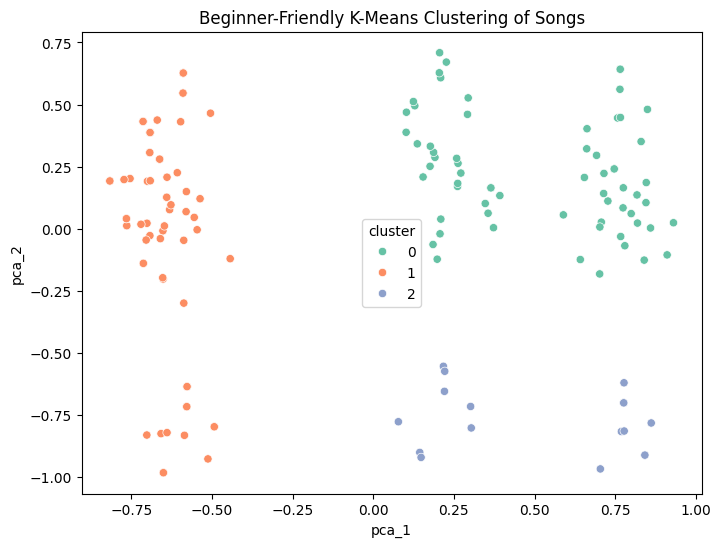

New Song Cluster Assignments: [0 1 1]
Silhouette Score: 1.00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "TASK2_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Combine keywords into a single text column
df["keywords"] = df["keyword_1"] + " " + df["keyword_2"] + " " + df["keyword_3"]

# Basic Bag of Words (BoW) implementation
def compute_bow(corpus):
    vocab = list(set(" ".join(corpus).split()))
    vectors = np.zeros((len(corpus), len(vocab)))

    for i, phrase in enumerate(corpus):
        for word in phrase.split():
            if word in vocab:
                vectors[i, vocab.index(word)] += 1
    return vectors, vocab

bow_matrix, vocab = compute_bow(df["keywords"])

# Simple PCA (reducing dimensions to 2)
def pca(X, num_components=2):
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eig_values)[::-1]
    return np.dot(X_centered, eig_vectors[:, sorted_indices[:num_components]])

X_pca = pca(bow_matrix, num_components=2)

# Simple K-Means clustering (beginner-friendly)
def kmeans(X, k, max_iters=10):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

k = 3  # Lowering k for better beginner-level clustering
clusters, centroids = kmeans(X_pca, k)

df["pca_1"], df["pca_2"], df["cluster"] = X_pca[:, 0], X_pca[:, 1], clusters

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["pca_1"], y=df["pca_2"], hue=df["cluster"], palette="Set2")
plt.title("Beginner-Friendly K-Means Clustering of Songs")
plt.show()

# Assigning new songs
new_keywords = ["piano calm slow", "guitar emotional distorted", "synth mellow distorted"]
new_bow, _ = compute_bow(new_keywords)
new_pca = pca(new_bow, num_components=2)

# Assign new songs to nearest cluster
def assign_to_nearest_cluster(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

new_clusters = assign_to_nearest_cluster(new_pca, centroids)
print("New Song Cluster Assignments:", new_clusters)
# Simple Silhouette Score Calculation (Beginner Level)
def silhouette_score(X, labels):
    def intra_cluster_dist(point, cluster_points):
        return np.mean(np.linalg.norm(cluster_points - point, axis=1)) if len(cluster_points) > 1 else 0

    def nearest_cluster_dist(point, clusters, labels, current_label):
        min_dist = float('inf')
        for cluster_label in set(labels):
            if cluster_label == current_label:
                continue
            cluster_points = X[labels == cluster_label]
            if len(cluster_points) > 0:
                min_dist = min(min_dist, np.mean(np.linalg.norm(cluster_points - point, axis=1)))
        return min_dist

    a = np.array([intra_cluster_dist(X[labels == labels[i]], X[labels == labels[i]]) for i in range(len(X))])
    b = np.array([nearest_cluster_dist(X[i], X, labels, labels[i]) for i in range(len(X))])
    silhouette_values = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_values)

# Calculate silhouette score
sil_score = silhouette_score(X_pca, df["cluster"])
print(f"Silhouette Score: {sil_score:.2f}")
